In [15]:
import torch 
torch.cuda.is_available()

True

In [1]:
from scipy import stats



In [2]:
! python test_cross_dataset.py --help

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
*************************88
usage: test_cross_dataset.py [-h] [--dist_dir DIST_DIR] [--ref_dir REF_DIR]
                             [--names_info NAMES_INFO]
                             [--model_file MODEL_FILE] [--save_path SAVE_PATH]
                             [--patching_method PATCHING_METHOD]

PyTorch WaDIQaM-FR test on the whole cross dataset

optional arguments:
  -h, --help            show this help message and exit
  --dist_dir DIST_DIR   distorted images dir.
  --ref_dir REF_DIR     reference images dir.
  --names_info NAMES_INFO
                        .mat file that includes image names in the dataset.
  --model_file MODEL_FILE
                        model file (default: checkpoints/WaDIQaM-FR-
                        KADID-10K-EXP1000-5-lr=0.0001-bs=4)
  --save_path SAVE_PATH
                        save path (default: scores)
  --patching_method PATCHING_METHOD
                        random or variance


## ON LIVE

In [3]:
%%time
! python test_cross_dataset.py --patching_method=variance  --dist_dir=databaserelease2  --model_file=variancePatch-WaDIQaM-NR-LIVE-EXP41-5-lr=0.0001-bs=4 --names_info=LIVEfullinfo.mat

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
*************************88
500 @@@@@@@@@@@@@@@@@@@@@@@@@@ ['jpeg/img49.bmp', 'jpeg/img36.bmp', 'fastfading/img78.bmp', 'gblur/img123.bmp', 'jp2k/img61.bmp', 'jpeg/img149.bmp', 'gblur/img53.bmp', 'jpeg/img188.bmp', 'jp2k/img13.bmp', 'jpeg/img96.bmp', 'gblur/img28.bmp', 'fastfading/img75.bmp', 'fastfading/img40.bmp', 'fastfading/img116.bmp', 'fastfading/img141.bmp', 'gblur/img84.bmp', 'fastfading/img105.bmp', 'jp2k/img225.bmp', 'gblur/img2.bmp', 'jp2k/img69.bmp', 'jpeg/img73.bmp', 'jp2k/img160.bmp', 'jp2k/img155.bmp', 'jpeg/img1.bmp', 'gblur/img56.bmp', 'jpeg/img144.bmp', 'jp2k/img170.bmp', 'gblur/img88.bmp', 'jpeg/img4.bmp', 'jpeg/img126.bmp', 'fastfading/img113.bmp', 'jpeg/img30.bmp', 'jpeg/img116.bmp', 'jp2k/img44.bmp', 'fastfading/img6.bmp', 'gblur/img47.bmp', 'jp2k/img149.bmp', 'jp2k/img116.bmp', 'wn/img66.bmp', 'jp2k/img162.bmp', 'fastfading/img112.bmp', 'wn/img114.bmp', 'jpeg/img102.bmp', 'wn/img111.bmp', 'fastfading/img126.bmp', 'wn/img74.bmp', 'fa

variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance

In [4]:
import numpy as np
predicts = np.load('scores.npy')

In [5]:
import h5py

Info = h5py.File("LIVEfullinfo.mat", 'r')
scale = Info['subjective_scores'][0, :].max()
mos = Info['subjective_scores'][0, :] / scale #
mos_std = Info['subjective_scoresSTD'][0, :] / scale

In [6]:
rands_index = []
with open("tmp_imgIndex.txt", "r") as f:
  for line in f:
    rands_index.append(int(line.strip()))

In [7]:
mos_ = []
mos_std_ = []
for i in rands_index:
    mos_.append(mos[i])
    mos_std_.append(mos_std[i])

In [8]:
len(predicts)

500

In [9]:
len(mos_)

500

In [10]:

stats.spearmanr(mos_, predicts)

SpearmanrResult(correlation=0.9113635174540697, pvalue=4.0108304317886604e-194)

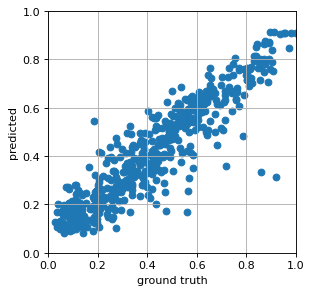

In [11]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(4,4), dpi=80)

# fig, ax = plt.subplots(figsize=(12, 12))

plt.xlabel("ground truth")
plt.ylabel("predicted")

plt.grid()

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.scatter(mos_, predicts)
plt.show()

## ON TID2013

In [30]:
%%time
! python test_cross_dataset.py --patching_method=variance  --dist_dir=distorted_images --ref_dir=reference_images --model_file=variancePatch-WaDIQaM-NR-LIVE-EXP41-5-lr=0.0001-bs=4 --names_info=TID2013fullinfo.mat

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
*************************88
500 @@@@@@@@@@@@@@@@@@@@@@@@@@ ['i04_23_3.bmp', 'i24_04_2.bmp', 'i10_11_4.bmp', 'i03_05_3.bmp', 'i18_24_4.bmp', 'i15_07_5.bmp', 'i01_17_1.bmp', 'i03_15_5.bmp', 'i14_16_4.bmp', 'i01_23_1.bmp', 'i02_06_3.bmp', 'i11_20_2.bmp', 'i02_10_2.bmp', 'i23_07_1.bmp', 'i06_05_1.bmp', 'i11_03_5.bmp', 'i15_21_2.bmp', 'i06_20_4.bmp', 'i09_05_3.bmp', 'i17_16_4.bmp', 'i19_13_4.bmp', 'i13_04_2.bmp', 'i01_05_2.bmp', 'i24_24_4.bmp', 'i15_16_2.bmp', 'i11_07_5.bmp', 'i21_15_5.bmp', 'i12_18_4.bmp', 'i12_19_2.bmp', 'i24_02_3.bmp', 'i10_14_2.bmp', 'i14_05_4.bmp', 'i20_22_2.bmp', 'i17_11_2.bmp', 'i07_24_1.bmp', 'i24_15_4.bmp', 'i03_04_5.bmp', 'i18_14_3.bmp', 'i20_12_3.bmp', 'i04_17_5.bmp', 'i21_15_2.bmp', 'i01_06_5.bmp', 'i10_03_2.bmp', 'i23_07_2.bmp', 'i09_19_5.bmp', 'i03_22_1.bmp', 'i23_14_5.bmp', 'i06_19_2.bmp', 'i08_03_2.bmp', 'i13_08_1.bmp', 'i06_15_3.bmp', 'i23_09_1.bmp', 'i08_10_2.bmp', 'i24_13_5.bmp', 'i01_03_4.bmp', 'i05_19_4.bmp', 'i23_02_1.bmp

In [31]:
import numpy as np
predicts = np.load('scores.npy')

In [32]:
import h5py

Info = h5py.File("TID2013fullinfo.mat", 'r')
scale = Info['subjective_scores'][0, :].max()
mos = Info['subjective_scores'][0, :] / scale #
mos_std = Info['subjective_scoresSTD'][0, :] / scale

In [33]:
rands_index = []
with open("tmp_imgIndex.txt", "r") as f:
  for line in f:
    rands_index.append(int(line.strip()))

In [34]:
mos_ = []
mos_std_ = []
for i in rands_index:
    mos_.append(mos[i])
    mos_std_.append(mos_std[i])

In [35]:
predicts = 1 - predicts
len(predicts)

500

In [36]:
predicts[:10]

array([0.35157883, 0.84967101, 0.28436136, 0.62907016, 0.47946751,
       0.22862047, 0.92243008, 0.76364692, 0.89402249, 0.87700738])

In [37]:
mos_[:10]

[0.5375511658111887,
 0.8085799156950996,
 0.30276160231984023,
 0.7346530289189926,
 0.4462684477613182,
 0.33883306603976276,
 0.7417708464727645,
 0.6646350507118511,
 0.7168314553476502,
 0.8712860170578116]

In [38]:
len(mos_)

500

In [39]:
stats.spearmanr(mos_, predicts)

SpearmanrResult(correlation=0.3476141112437644, pvalue=1.200497884886191e-15)

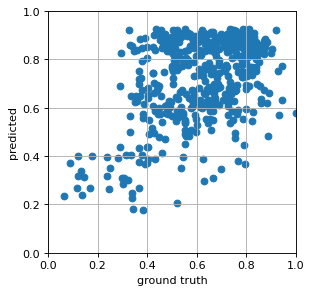

In [40]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(4,4), dpi=80)

# fig, ax = plt.subplots(figsize=(12, 12))

plt.xlabel("ground truth")
plt.ylabel("predicted")

plt.grid()

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.scatter(mos_, predicts)
plt.show()

## test on flipped images

In [41]:
from argparse import ArgumentParser
import torch
from torch import nn
import torch.nn.functional as F
from PIL import Image
from main import RandomCropPatches, VarianceThresholdPatchSelection, NRnet
import numpy as np
import h5py, os , random

In [42]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = NRnet(weighted_average=True).to(device)

model.load_state_dict(torch.load("variancePatch-WaDIQaM-NR-LIVE-EXP41-5-lr=0.0001-bs=4"))

<All keys matched successfully>

In [43]:
import glob

im_names = glob.glob('flipped_test/*')
im_names

['flipped_test\\a.bmp',
 'flipped_test\\a1.png',
 'flipped_test\\b.bmp',
 'flipped_test\\b1.png',
 'flipped_test\\c.bmp',
 'flipped_test\\c1.png',
 'flipped_test\\d.bmp',
 'flipped_test\\d1.png',
 'flipped_test\\e.bmp',
 'flipped_test\\e1.png']

In [44]:
model.eval()
scores = []   
with torch.no_grad():
        for i in range(len(im_names)):
            im = Image.open(os.path.join( im_names[i])).convert('RGB')
            # ref = Image.open(os.path.join(args.ref_dir, ref_names[i])).convert('RGB')
            # data = RandomCropPatches(im, ref)
            data = VarianceThresholdPatchSelection(im)
            
            dist_patches = data.unsqueeze(0).to(device)
            # ref_patches = data[1].unsqueeze(0).to(device)
            # score = model((dist_patches, ref_patches))

            score = model((dist_patches))
            scores.append(score.item())


            
 

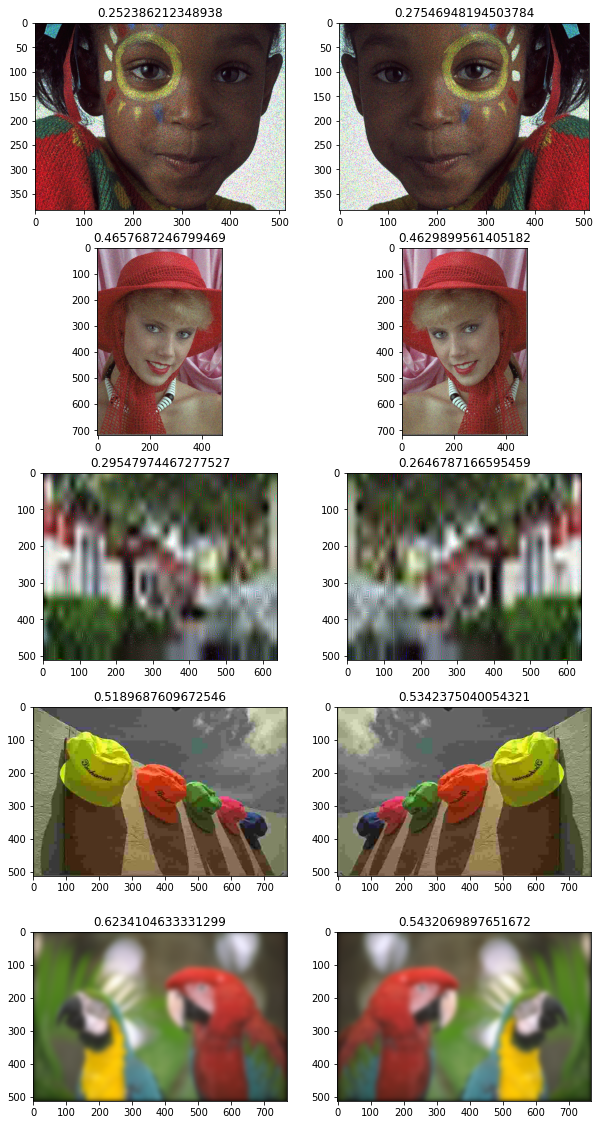

In [45]:
import cv2
f, axarr = plt.subplots(5,2 , figsize=(10, 20))
for i in range(len(im_names)//2):
    a = cv2.imread(im_names[i*2])
    b = cv2.imread(im_names[i*2+1])
    a = cv2.cvtColor(a, cv2.COLOR_RGB2BGR)
    b = cv2.cvtColor(b, cv2.COLOR_RGB2BGR)
    axarr[i,0].imshow(a)
    axarr[i,0].set_title(str(scores[i*2])) 
    axarr[i,1].imshow(b)
    axarr[i,1].set_title(str(scores[i*2+1])) 
  